In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
housing_data = pd.read_csv("C:\\Users\\yunus\\Desktop\\Yapay Zeka Projesi\\housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing_data.shape

(20640, 10)

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


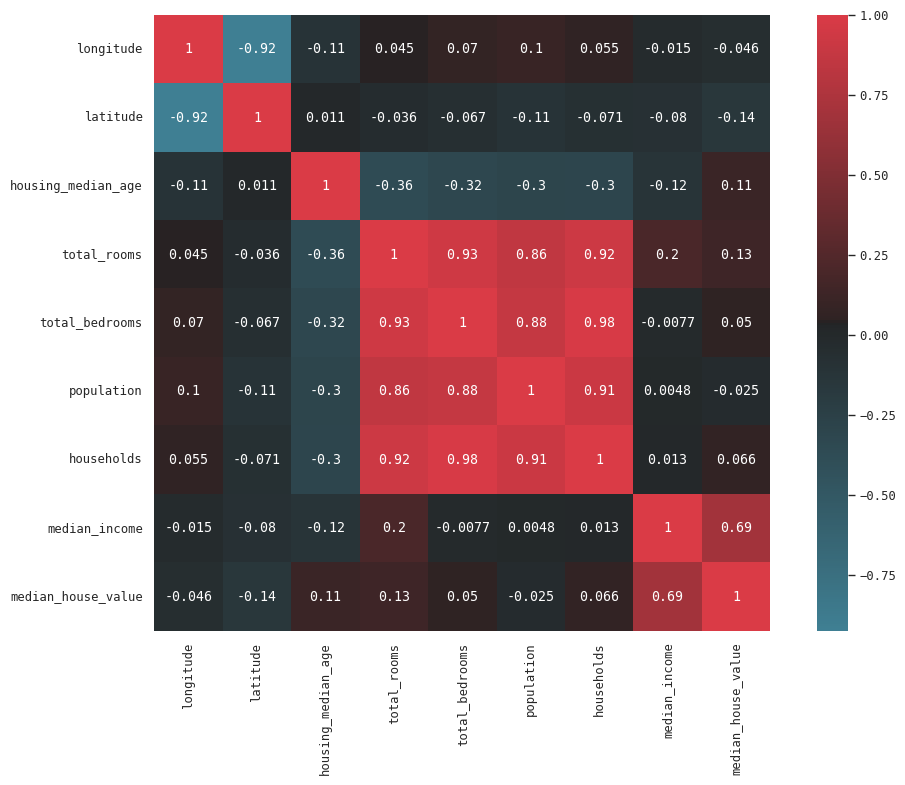

In [7]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing_data.corr()
fig, axe = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220,10,center = "dark", as_cmap=True)
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

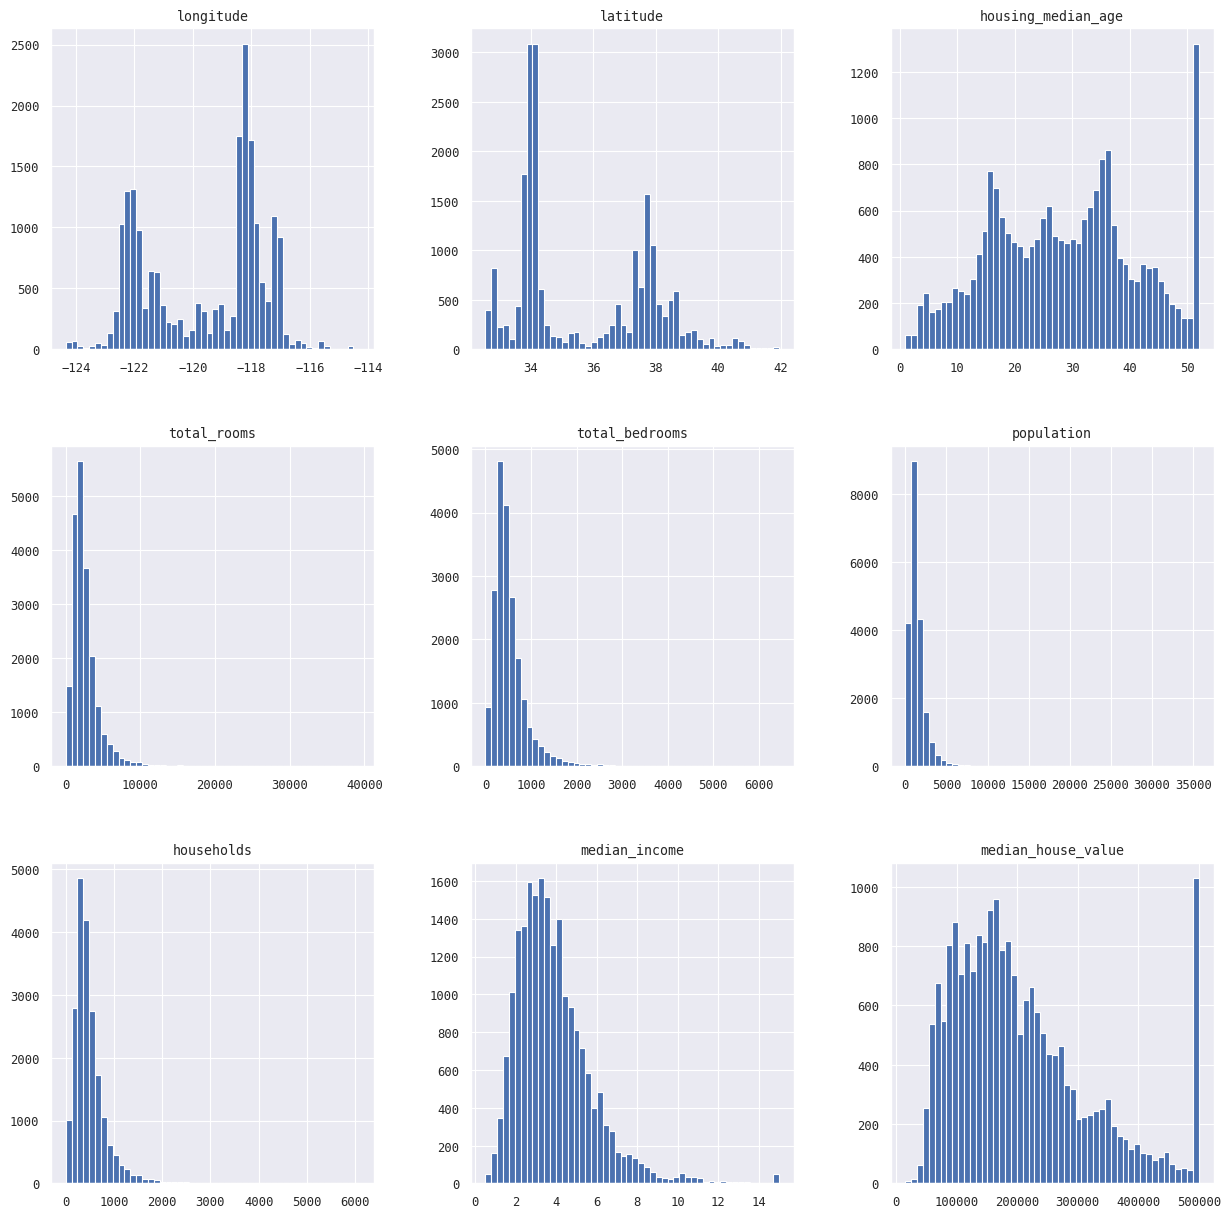

In [8]:
housing_data.hist(bins=50, figsize=(15, 15))

In [9]:
Q1 = housing_data.quantile(0.25)
Q3 = housing_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64


In [10]:
print(housing_data.shape)
lowerBound = Q1["total_bedrooms"]-1.5*IQR["total_bedrooms"]
upperBound = Q3["total_bedrooms"] +1.5*IQR["total_bedrooms"]

data = housing_data[(housing_data["total_bedrooms"] < lowerBound) | (housing_data["total_bedrooms"] > upperBound)]

housing_data = housing_data[~housing_data["total_bedrooms"].isin(data["total_bedrooms"])]

print(housing_data.shape)

(20640, 10)
(19369, 10)


In [11]:
print(housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [12]:
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mode()[0], inplace=True)

In [13]:
print(housing_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [14]:
labelEncoder = LabelEncoder()
print(housing_data["ocean_proximity"].value_counts())
housing_data["ocean_proximity"] = labelEncoder.fit_transform(housing_data["ocean_proximity"])
print(housing_data["ocean_proximity"].value_counts())
housing_data.describe()

<1H OCEAN     8570
INLAND        6100
NEAR OCEAN    2534
NEAR BAY      2160
ISLAND           5
Name: ocean_proximity, dtype: int64
0    8570
1    6100
4    2534
3    2160
2       5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000
mean,-119.597728,35.656088,29.397439,2258.836491,456.131034,1245.029532,430.054572,3.867155,205994.868398,1.173318
std,2.000617,2.144167,12.380579,1244.562829,236.173865,702.310112,223.765232,1.916528,115891.186285,1.426992
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.810000,33.940000,19.000000,1407.000000,284.000000,766.000000,273.000000,2.553600,118200.000000,0.000000
50%,-118.530000,34.270000,30.000000,2038.000000,414.000000,1119.000000,392.000000,3.527200,178300.000000,1.000000
75%,-118.030000,37.720000,38.000000,2898.000000,592.000000,1594.000000,557.000000,4.740400,263800.000000,1.000000
max,-114.490000,41.950000,52.000000,11709.000000,1173.000000,8733.000000,3589.000000,15.000100,500001.000000,4.000000


## Machine Learning

### Linear Regression

In [15]:
names = housing_data.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(housing_data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.315764,1.037218,0.937182,-1.107917,-1.385164,-1.314310,-1.358846,2.326165,2.127957,1.280126
1,-1.310766,1.027891,-0.678293,3.889148,2.751726,1.645997,3.163868,2.313746,1.315968,1.280126
2,-1.320763,1.023227,1.825694,-0.636253,-1.126873,-1.066550,-1.130922,1.768997,1.260742,1.280126
3,-1.325762,1.023227,1.825694,-0.791332,-0.936330,-0.978268,-0.943221,0.926671,1.167549,1.280126
4,-1.325762,1.023227,1.825694,-0.507691,-0.745788,-0.968300,-0.764457,-0.010934,1.175315,1.280126


In [16]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features].values
Y=scaled_df['median_house_value'].values

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15495, 9) (15495,)
(3874, 9) (3874,)


In [18]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict = linreg.predict(x_test)

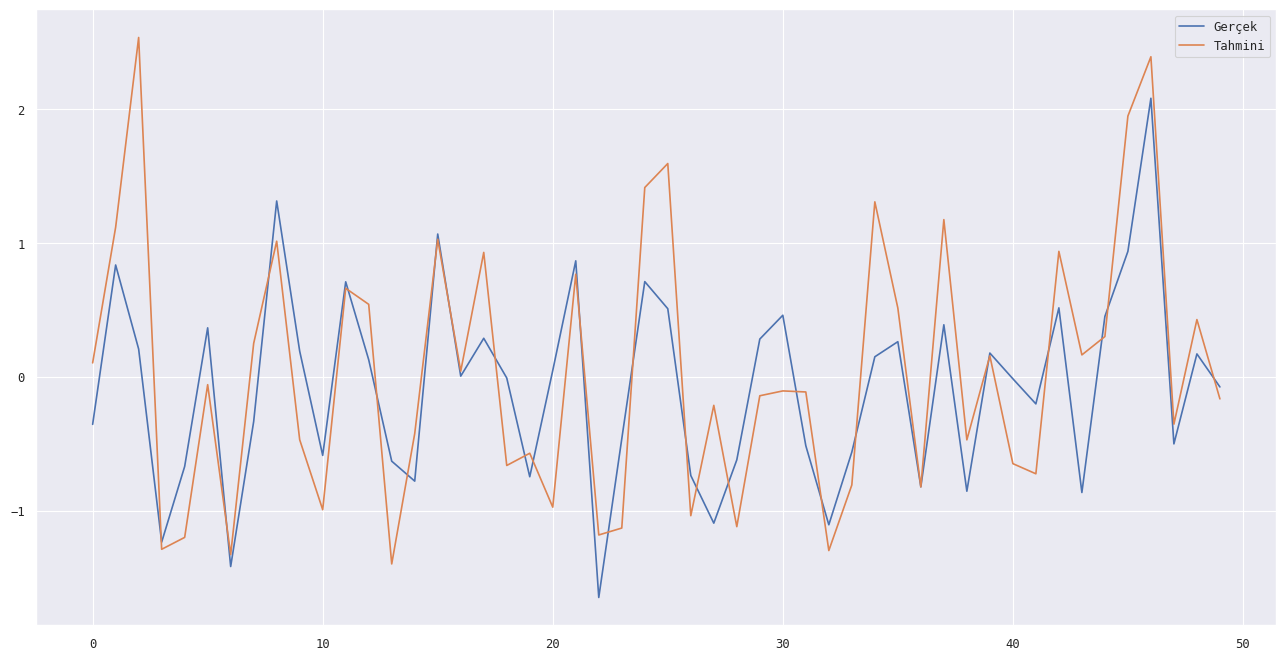

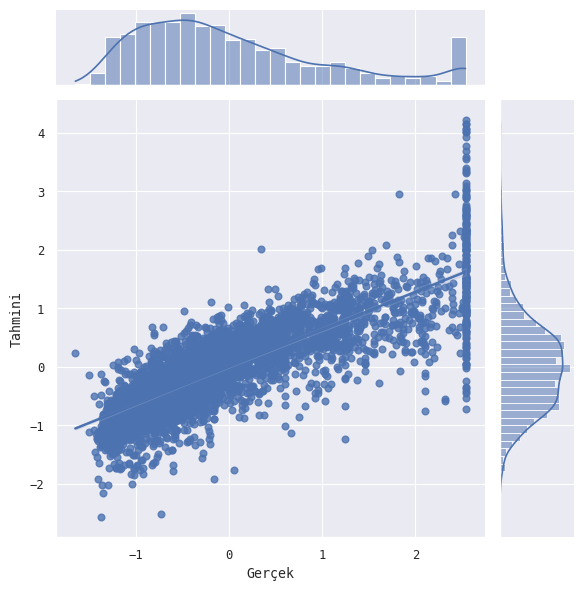

In [20]:
test = pd.DataFrame({'Tahmini':y_predict,'Gerçek':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Gerçek','Tahmini'])
sns.jointplot(x='Gerçek',y='Tahmini',data=test,kind='reg',);

#### Linear Regression için ölçüt değerleri

In [21]:
print('Mean Squared Error:', sqrt(mean_squared_error(y_test,y_predict)))
print('R2 Score:', r2_score(y_test,y_predict))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))

Mean Squared Error: 0.5961128497914089
R2 Score: 0.6590512333574116
Mean Absolute Error: 0.43961149398855665


### Lasso Regression

In [22]:
lassoreg = Lasso(alpha = 0.001, normalize = True)
lassoreg.fit(x_train,y_train)

Lasso(alpha=0.001, normalize=True)

#### Lasso Regression için ölçüt değerleri

In [23]:
print('Mean Squared Error:', sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Score:', lassoreg.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, lassoreg.predict(x_test)))

Mean Squared Error: 0.7343010343438326
R2 Score: 0.48265478506529624
Mean Absolute Error: 0.5517327088407132


### Ridge Regression

In [24]:
ridgereg = Ridge(alpha = 0.001, normalize = True)
ridgereg.fit(x_train, y_train)

Ridge(alpha=0.001, normalize=True)

#### Ridge Regression için ölçüt değerleri

In [25]:
print('Mean Squared Error:', sqrt(mean_squared_error(y_test, ridgereg.predict(x_test))))
print('R2 Score:', ridgereg.score(x_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, ridgereg.predict(x_test)))

Mean Squared Error: 0.5964318992546599
R2 Score: 0.6586861728446866
Mean Absolute Error: 0.4397491210857019


### k-Nearest Neighbors Regression

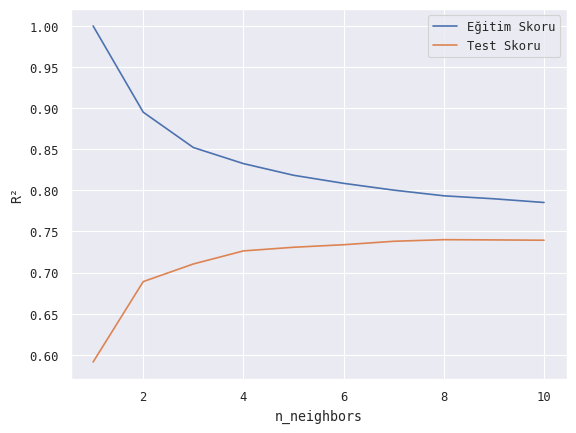

In [26]:
training_score = []
test_score = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 knn = KNeighborsRegressor(n_neighbors = n_neighbors)
 knn.fit(x_train, y_train)
 training_score.append(knn.score(x_train, y_train))
 test_score.append(knn.score(x_test, y_test))
plt.plot(neighbors_settings, training_score, label = 'Eğitim Skoru')
plt.plot(neighbors_settings, test_score, label = 'Test Skoru')
plt.ylabel('R²')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('knn_compare_model')

#### k-Nearest Neighbors Regression için ölçüt değerleri

In [27]:
print('Mean Squared Error:', sqrt(mean_squared_error(y_test, knn.predict(x_test))))
print('R2 Score:', knn.score(x_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn.predict(x_test)))

Mean Squared Error: 0.5211839726663514
R2 Score: 0.7393760873185443
Mean Absolute Error: 0.3502493606278588


### Random Forest Regression

In [28]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

#### Radom Forest Regression için ölçüt değerleri

In [29]:
print('Mean Squared Error:', sqrt(mean_squared_error(y_test, rfr.predict(x_test))))
print('R2 Score:', r2_score(rfr.predict(x_test), y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, rfr.predict(x_test)))

Mean Squared Error: 0.44158086847920247
R2 Score: 0.7649501622559564
Mean Absolute Error: 0.28318019218711804


## Değerlendirme Ölçütleri

In [30]:
d_olcut_data = np.array([[0.60, 0.73, 0.60, 0.52, 0.44], 
                         [0.66, 0.48, 0.66, 0.74, 0.77], 
                         [ 0.77, 0.55, 0.44, 0.35, 0.28]])

d_olcut_column = ['Linear Regression', ' Lasso Regression', 'Ridge Regression', 'k-Nearest Neighbors Regression', 'Random Forest Regression']

d_olcut_index = ['Mean Squared Error', 'R2 Score', 'Mean Absolute Error']

pd.DataFrame(data = d_olcut_data, index= d_olcut_index, columns = d_olcut_column, dtype = "float")

,Linear Regression,Lasso Regression,Ridge Regression,k-Nearest Neighbors Regression,Random Forest Regression
Mean Squared Error,0.60,0.73,0.60,0.52,0.44
R2 Score,0.66,0.48,0.66,0.74,0.77
Mean Absolute Error,0.77,0.55,0.44,0.35,0.28
